In [39]:
import os
import pandas as pd
import numpy as np
import os
import glob
import tensorflow as tf
from keras import backend as K
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense , Input,Lambda
from tensorflow.keras.layers import Conv2D, TimeDistributed, MaxPooling2D, Flatten, Dense,GlobalAveragePooling1D,GlobalAveragePooling2D
from tensorflow.keras.layers import Reshape
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau , EarlyStopping
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import TimeDistributed, Bidirectional, Dropout, Attention,BatchNormalization
from tensorflow.keras.layers import LSTM, Lambda, Dense, Permute, Multiply, RepeatVector, Activation, add, Conv2D, GlobalAveragePooling2D,Dropout
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
fullpath = '/kaggle/input/crimeucfdataset/'
os.listdir(fullpath)

['anomaly', 'Anomaly_Dataset']

In [3]:
p = os.path.join(fullpath,'Anomaly_Dataset')

In [4]:
p1 = os.path.join(p,'Anomaly_Videos')
new_path=[]
for i in os.listdir(p1):
    if i[-3:] =='txt':
        pass
    else:
        new_path.append(i)
        
        

In [5]:
p_an1 = os.path.join(p1,new_path[0])
p_an2 = os.path.join(p1,new_path[1])
p_no = os.path.join(p1,new_path[2])

In [6]:


# Set the directory paths and class names
dir_path_1 = p_an1
dir_path_2 = p_an2
class_names_1 = [ "Explosion","Fighting"]
class_names_2 = ["Abuse","Assault"]

# Initialize empty lists for the video paths and labels
video_paths = []
labels = []

# Iterate over the first directory and class names to retrieve the video paths and labels
for class_name in class_names_1:
    # Get the path to the class subdirectory
    class_dir_path = os.path.join(dir_path_1, class_name)
    
    # Get a list of file paths in the class subdirectory
    file_paths = glob.glob(os.path.join(class_dir_path, "*.mp4"))
    
    # Append the file paths and class label to the lists
    video_paths.extend(file_paths)
    labels.extend([class_name] * len(file_paths))

# Iterate over the second directory and class names to retrieve the video paths and labels
for class_name in class_names_2:
    # Get the path to the class subdirectory
    class_dir_path = os.path.join(dir_path_2, class_name)
    
    # Get a list of file paths in the class subdirectory
    file_paths = glob.glob(os.path.join(class_dir_path, "*.mp4"))
    
    # Append the file paths and class label to the lists
    video_paths.extend(file_paths)
    labels.extend([class_name] * len(file_paths))

# Create a dataframe with the video paths and labels
df = pd.DataFrame({"video_path": video_paths, "label": labels})

# Print the dataframe
print(df)

                                            video_path      label
0    /kaggle/input/crimeucfdataset/Anomaly_Dataset/...  Explosion
1    /kaggle/input/crimeucfdataset/Anomaly_Dataset/...  Explosion
2    /kaggle/input/crimeucfdataset/Anomaly_Dataset/...  Explosion
3    /kaggle/input/crimeucfdataset/Anomaly_Dataset/...  Explosion
4    /kaggle/input/crimeucfdataset/Anomaly_Dataset/...  Explosion
..                                                 ...        ...
195  /kaggle/input/crimeucfdataset/Anomaly_Dataset/...    Assault
196  /kaggle/input/crimeucfdataset/Anomaly_Dataset/...    Assault
197  /kaggle/input/crimeucfdataset/Anomaly_Dataset/...    Assault
198  /kaggle/input/crimeucfdataset/Anomaly_Dataset/...    Assault
199  /kaggle/input/crimeucfdataset/Anomaly_Dataset/...    Assault

[200 rows x 2 columns]


In [7]:
video_paths = []
labels = []

# Get a list of file paths in the class subdirectory
file_paths = glob.glob(os.path.join(p_no, "*.mp4"))

# Append the file paths and class label to the lists
video_paths.extend(file_paths)
labels.extend(['Normal'] * len(file_paths))
# Create a new dataframe with the new video paths and labels
df_new = pd.DataFrame({"video_path": video_paths, "label": labels})

In [8]:
All_Data =  pd.concat([df, df_new], ignore_index=True)
All_Data

,video_path,label
0,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Explosion
1,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Explosion
2,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Explosion
3,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Explosion
4,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Explosion
...,...,...
345,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
346,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
347,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
348,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal


In [9]:
df_shuffled = All_Data.sample(frac=1.0, random_state=42)
df_shuffled = df_shuffled.reset_index(drop=True)
df_shuffled

,video_path,label
0,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Assault
1,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
2,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
3,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
4,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Assault
...,...,...
345,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Fighting
346,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Abuse
347,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal
348,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,Normal


In [10]:
df_shuffled['label'].value_counts()

Normal       150
Assault       50
Fighting      50
Abuse         50
Explosion     50
Name: label, dtype: int64

In [11]:
label_map = {'Normal': 0, 'Abuse': 1, 'Assault': 2, 'Explosion': 3, 'Fighting': 4,'RoadAccidents':5}
df_shuffled['label'] = df_shuffled['label'].map(label_map)

In [12]:
df_shuffled

,video_path,label
0,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,2
1,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,0
2,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,0
3,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,0
4,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,2
...,...,...
345,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,4
346,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,1
347,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,0
348,/kaggle/input/crimeucfdataset/Anomaly_Dataset/...,0


In [13]:
from sklearn.model_selection import train_test_split

# Split the dataframe into training and testing sets
train_df, val_df = train_test_split(df_shuffled, test_size=0.3, random_state=42)


In [14]:
len(train_df)

245

In [15]:
train_df['label'].value_counts()


0    102
3     37
4     36
1     35
2     35
Name: label, dtype: int64

In [16]:
len(val_df)

105

In [17]:
val_df['label'].value_counts()


0    48
1    15
2    15
4    14
3    13
Name: label, dtype: int64

In [18]:
X_train , y_train, X_val, y_val = train_df['video_path'].tolist() , train_df['label'].tolist(),val_df['video_path'].tolist() , val_df['label'].tolist()

# generator #1

In [52]:
%%writefile mod_gen5.py
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

class VideoDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, video_paths, labels, batch_size=32, frame_size=(224, 224), num_channels=3, num_classes=5, shuffle=True, num_frames=30):
        self.video_paths = video_paths
        self.labels = labels
        self.batch_size = batch_size
        self.frame_size = frame_size
        self.num_channels = num_channels
        self.num_classes = num_classes
        self.shuffle = shuffle
        self.num_frames = num_frames
        self.indexes = np.arange(len(self.video_paths))
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.video_paths) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        video_paths_batch = [self.video_paths[k] for k in indexes]
        labels_batch = [self.labels[k] for k in indexes]
        X, y = self.__data_generation(video_paths_batch, labels_batch)
        return X, y

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, video_paths_batch, labels_batch):
        X = np.zeros((self.batch_size, self.num_frames, *self.frame_size, self.num_channels))
        y = np.zeros(self.batch_size)
        #print('labels_batch:', labels_batch)
        #print('num_classes:', self.num_classes)
        for i, video_path in enumerate(video_paths_batch):
            frames = self.get_frames(video_path)
      
          
            X[i,:,:,:,:] = frames
            #print(X)
            y[i,] = labels_batch[i]
        return X, y

 
    def get_frames(self, video_path):
        import cv2
        mean = [0.22146088 , 0.20873131  ,0.2019145 ]
        std =  [0.52410259  ,0.52200656  ,0.52084839]
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            cap.open(video_path)
        # Get the total number of frames
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
           # Calculate the number of frames in the second and third parts of the video
        #num_frames_left = total_frames - (total_frames // 3)
        # Calculate the time interval between frames for the second and third parts of the video
        time_interval = total_frames /self.num_frames
        clips=[]
        # Sample frames at a fixed time interval for the second and third clips
        frames = []
        for i in range(self.num_frames):
            # Calculate the frame index based on the time interval for the second and third clips
            frame_index = int(i * time_interval)
            # Seek to the frame index using cv2.CAP_PROP_POS_FRAMES
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
            ret = True
            if (True and ret):
                # Read and decode the frame
                ret, frame = cap.read()
                # Append the frame to the list of frames
                if ret==False:
                    break
                frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
                frame = (frame ) / 255
                frame = cv2.resize(frame,(self.frame_size[0], self.frame_size[1]))
                frames.append(frame)

        return frames

Writing mod_gen5.py


In [53]:
from mod_gen5 import VideoDataGenerator


In [54]:
# def __init__(self, video_paths, labels, batch_size, frame_size=(224, 224), num_channels=3, num_classes=2, shuffle=True, num_frames=16):

train_generator = VideoDataGenerator(X_train, y_train, batch_size=64, frame_size=(224, 224), num_channels=3, num_classes=5, shuffle=False, num_frames=30)
val_generator = VideoDataGenerator(X_val, y_val, batch_size=64, frame_size=(224, 224), num_channels=3, num_classes=5, shuffle=False, num_frames=30)

In [55]:
X_batch, y_batch = train_generator[0]


In [56]:
X_batch.shape

(64, 30, 224, 224, 3)

In [57]:
y_batch.shape

(64,)

In [58]:
X_batch[0].shape

(30, 224, 224, 3)

In [59]:
X_batch[0]

array([[[[0.73039216, 0.76176471, 0.71470588],
         [0.74118647, 0.77255902, 0.73054222],
         [0.77211885, 0.8034914 , 0.76427571],
         ...,
         [0.78110244, 0.80183073, 0.76681673],
         [0.70896359, 0.73529412, 0.69859944],
         [0.6454982 , 0.67687075, 0.63765506]],

        [[0.59095638, 0.6214886 , 0.57989196],
         [0.56426571, 0.59479792, 0.55770308],
         [0.59636855, 0.62690076, 0.59230692],
         ...,
         [0.67804122, 0.6987395 , 0.66204482],
         [0.55236094, 0.57869148, 0.54031613],
         [0.57178872, 0.60316126, 0.56226491]],

        [[0.09470788, 0.11823729, 0.12215886],
         [0.10168067, 0.12521008, 0.12913165],
         [0.17710084, 0.20063025, 0.20455182],
         ...,
         [0.48351341, 0.50396158, 0.4532613 ],
         [0.52244898, 0.54877951, 0.49639856],
         [0.50691277, 0.53828531, 0.48338335]],

        ...,

        [[0.43992597, 0.46737695, 0.52227891],
         [0.3792517 , 0.40670268, 0.46160464]

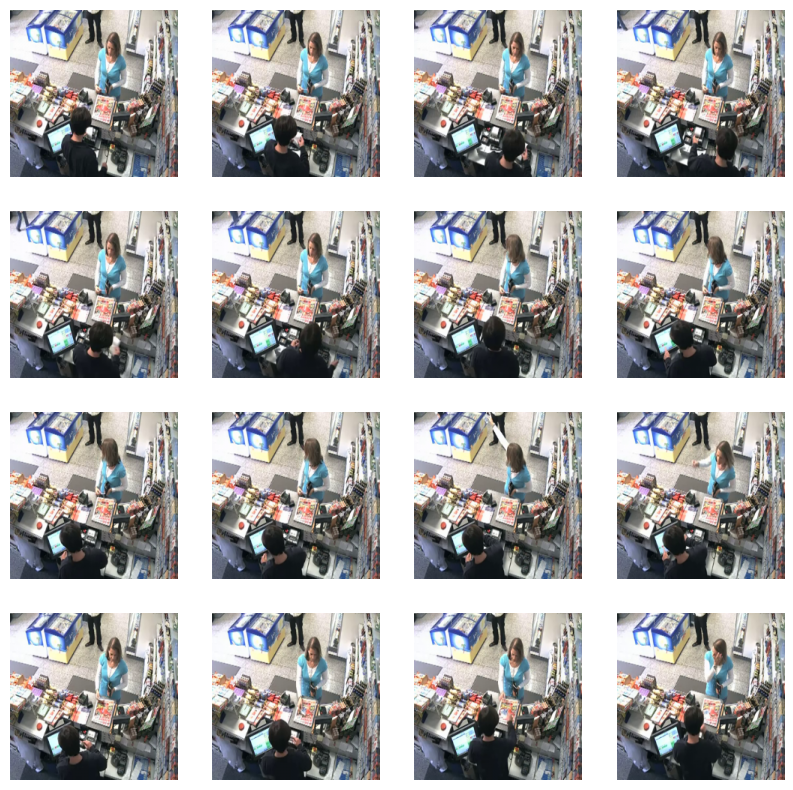

In [62]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))

t = X_batch[0]
for i, ax in enumerate(axes.flat):
    # Get the i-th frame tensor and convert it to a numpy array
    frame_tensor = t[i, :, :, :]  # shape = (3,112,112)  # loop on frame?? 16
    #print(frame_tensor.shape)
    # Plot the frame using imshow
    ax.imshow(frame_tensor)  #  shape transpose
    ax.set_axis_off()

plt.show()

In [61]:
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense, Reshape, Lambda, Conv2D
from tensorflow.keras.layers import DepthwiseConv2D, BatchNormalization, Add, Activation, GlobalAveragePooling2D,TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2

In [63]:
# Create MobileNetV2 model without the final classification layers
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')

# set all layers in the pre-trained MobileNetV2 model to non-trainable
for layer in mobilenet_model.layers:
    layer.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [64]:
mobilenet_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 Conv1 (Conv2D)                 (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, None, None,   128         ['Conv1[0][0]']                  
                                32)                                            

In [68]:
X_batch = X_batch.reshape((64*30, 224, 224, 3))

features_extracted = mobilenet_model.predict(X_batch)

60/60 [==============================] - 47s 768ms/step


In [70]:
features_extracted.shape

(1920, 1280)

In [71]:
features_extracted = features_extracted.reshape((64, 30, 1280))

In [75]:
features_extracted[0][29]

array([0.        , 0.0524783 , 0.5871927 , ..., 0.21251573, 0.17305176,
       0.01617724], dtype=float32)

# try model1

In [95]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model


# Define the LSTM model to make predictions
input_layer = Input(shape=(30, 1280))
lstm_layer = LSTM(128)(input_layer)
output_layer = Dense(5, activation='softmax')(lstm_layer)
lstm_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the LSTM model using the custom generator
num_epochs = 10
batch_size =64
steps_per_epoch = len(train_generator) # code to compute the number of steps per epoch
validation_steps = len(val_generator)
for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch+1, num_epochs))
    train_loss = 0.0
    val_loss = 0.0
    train_acc = 0.0
    val_acc = 0.0
    for step in range(steps_per_epoch):
        # Generate a batch of videos and labels using the custom generator
        X_batch, y_batch = train_generator[step]

        # Extract features from the videos using the MobileNetV2 model
        X_batch = X_batch.reshape((batch_size*30, 224, 224, 3))
        features_extracted = mobilenet_model.predict(X_batch)
        features_extracted = features_extracted.reshape((batch_size, 30, 1280))

      # Train the LSTM model on the batch of features
        loss, acc = lstm_model.train_on_batch(features_extracted, y_batch)
        train_loss += loss
        train_acc += acc
    train_loss /= steps_per_epoch
    train_acc /= steps_per_epoch

    val_features = []
    val_labels = []
    for i in range(validation_steps):
        X_val_batch, y_val_batch = val_generator[i]
        val_labels.append(y_val_batch)
        val_features_extracted = mobilenet_model.predict(X_val_batch.reshape((batch_size*30, 224, 224, 3)))
        val_features_extracted = val_features_extracted.reshape((batch_size, 30, 1280))
        val_features.append(val_features_extracted)
    val_features = np.concatenate(val_features, axis=0)
    val_labels = np.concatenate(val_labels, axis=0)
    val_loss, val_acc = lstm_model.evaluate(val_features, val_labels, batch_size=batch_size)
    print('Train loss: {:.4f}, Train accuracy: {:.4f}, Validation loss: {:.4f}, Validation accuracy: {:.4f}'.format(train_loss, train_acc, val_loss, val_acc))


Epoch 1/10
2/2 [==============================] - 1s 59ms/step - loss: 1.3011 - accuracy: 0.4688
Train loss: 1.5828, Train accuracy: 0.3516, Validation loss: 1.3011, Validation accuracy: 0.4688
Epoch 2/10
2/2 [==============================] - 0s 43ms/step - loss: 1.0184 - accuracy: 0.6719
Train loss: 1.1055, Train accuracy: 0.6680, Validation loss: 1.0184, Validation accuracy: 0.6719
Epoch 3/10
2/2 [==============================] - 0s 42ms/step - loss: 0.8916 - accuracy: 0.6797
Train loss: 0.8402, Train accuracy: 0.6914, Validation loss: 0.8916, Validation accuracy: 0.6797
Epoch 4/10
2/2 [==============================] - 0s 44ms/step - loss: 0.8501 - accuracy: 0.6797
Train loss: 0.6624, Train accuracy: 0.8086, Validation loss: 0.8501, Validation accuracy: 0.6797
Epoch 5/10
2/2 [==============================] - 0s 44ms/step - loss: 0.8467 - accuracy: 0.6562
Train loss: 0.5048, Train accuracy: 0.8789, Validation loss: 0.8467, Validation accuracy: 0.6562
Epoch 6/10
2/2 [==============

- ## overfitting !!!

# full model

- ## same as before but let's take 50 frames and derease the batch size to be 32 for example , make label one hot encoded
- ## change the model (add more lstm layers , add attention, add residual blocks)


In [19]:

%%writefile mod_gen66.py
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

class VideoDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, video_paths, labels, batch_size=32, frame_size=(224, 224), num_channels=3, num_classes=5, shuffle=True, num_frames=30):
        self.video_paths = video_paths
        self.labels = labels
        self.batch_size = batch_size
        self.frame_size = frame_size
        self.num_channels = num_channels
        self.num_classes = num_classes
        self.shuffle = shuffle
        self.num_frames = num_frames
        self.indexes = np.arange(len(self.video_paths))
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.video_paths) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        video_paths_batch = [self.video_paths[k] for k in indexes]
        labels_batch = [self.labels[k] for k in indexes]
        X, y = self.__data_generation(video_paths_batch, labels_batch)
        return X, y

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, video_paths_batch, labels_batch):
        X = np.zeros((self.batch_size, self.num_frames, *self.frame_size, self.num_channels))
        y = np.zeros((self.batch_size, self.num_classes))
        #print('labels_batch:', labels_batch)
        #print('num_classes:', self.num_classes)
        for i, video_path in enumerate(video_paths_batch):
            frames = self.get_frames(video_path)
      
          
            X[i,:,:,:,:] = frames
            #print(X)
            y[i,] = tf.keras.utils.to_categorical(labels_batch[i], num_classes=self.num_classes)
        return X, y

 
    def get_frames(self, video_path):
        import cv2
        mean = [0.22146088 , 0.20873131  ,0.2019145 ]
        std =  [0.52410259  ,0.52200656  ,0.52084839]
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            cap.open(video_path)
        # Get the total number of frames
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
           # Calculate the number of frames in the second and third parts of the video
        #num_frames_left = total_frames - (total_frames // 3)
        # Calculate the time interval between frames for the second and third parts of the video
        time_interval = total_frames /self.num_frames
        clips=[]
        # Sample frames at a fixed time interval for the second and third clips
        frames = []
        for i in range(self.num_frames):
            # Calculate the frame index based on the time interval for the second and third clips
            frame_index = int(i * time_interval)
            # Seek to the frame index using cv2.CAP_PROP_POS_FRAMES
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
            ret = True
            if (True and ret):
                # Read and decode the frame
                ret, frame = cap.read()
                # Append the frame to the list of frames
                if ret==False:
                    break
                frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
                frame = (frame ) / 255
                frame = cv2.resize(frame,(self.frame_size[0], self.frame_size[1]))
                frames.append(frame)

        return frames

Writing mod_gen66.py


In [20]:
from mod_gen66 import VideoDataGenerator

In [21]:
# def __init__(self, video_paths, labels, batch_size, frame_size=(224, 224), num_channels=3, num_classes=2, shuffle=True, num_frames=16):

train_generator = VideoDataGenerator(X_train, y_train, batch_size=32, frame_size=(224, 224), num_channels=3, num_classes=5, shuffle=False, num_frames=30)
val_generator = VideoDataGenerator(X_val, y_val, batch_size=32, frame_size=(224, 224), num_channels=3, num_classes=5, shuffle=False, num_frames=30)

In [23]:
X_batch, y_batch = train_generator[0]



In [24]:
print(X_batch.shape)
print(y_batch.shape)

(32, 30, 224, 224, 3)
(32, 5)


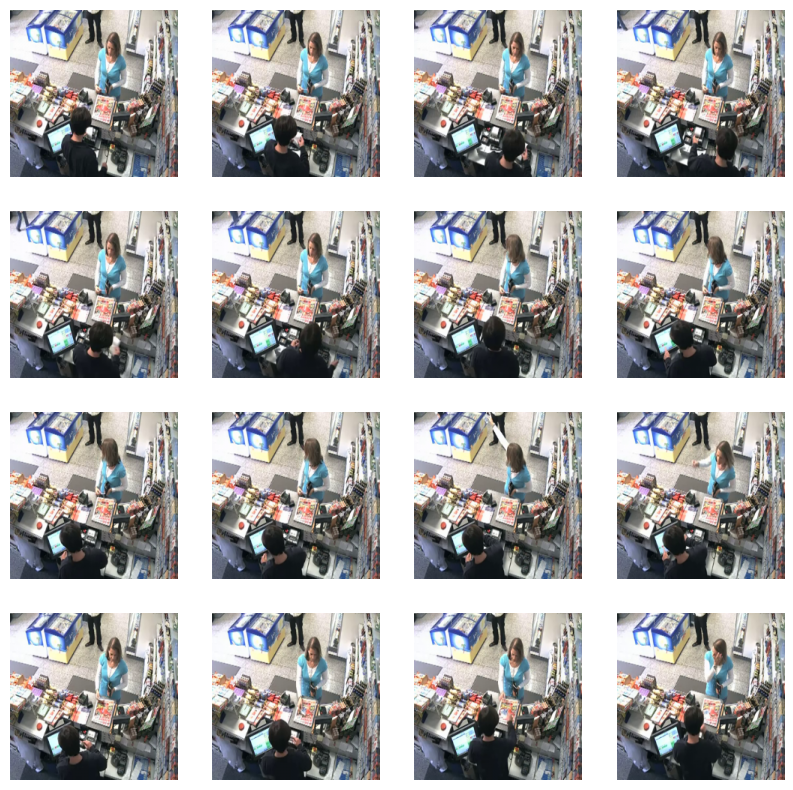

In [25]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))

t = X_batch[0]
for i, ax in enumerate(axes.flat):
    # Get the i-th frame tensor and convert it to a numpy array
    frame_tensor = t[i, :, :, :]  # shape = (3,112,112)  # loop on frame?? 16
    #print(frame_tensor.shape)
    # Plot the frame using imshow
    ax.imshow(frame_tensor)  #  shape transpose
    ax.set_axis_off()

plt.show()

In [26]:
len(train_generator)

8

In [ ]:
# model modificatons

import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import TimeDistributed, Bidirectional, Dropout, Attention,BatchNormalization


######### mobilenetv2 model 

# Create MobileNetV2 model without the final classification layers
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')

# set all layers in the pre-trained MobileNetV2 model to non-trainable
for layer in mobilenet_model.layers:
    layer.trainable = False

############################
def attention_block(inputs):
    """
    Compute attention scores and apply them to the input tensor.
    """
    input_dim = int(inputs.shape[2])
    a = Permute((2, 1))(inputs)  # convert (batch_size, timesteps, input_dim) to (batch_size, input_dim, timesteps)
    a = Dense(inputs.shape[1], activation='softmax')(a)  # compute attention scores
    a = Permute((2, 1))(a)  # convert (batch_size, input_dim, timesteps) back to (batch_size, timesteps, input_dim)
    a = Multiply()([inputs, a])  # apply attention scores to input tensor
    return a

def make_residual_lstm_layers(input, rnn_width, rnn_depth, rnn_dropout, num_classes):
    """
    The intermediate LSTM layers return sequences, while the last returns a single element.
    The input is also a sequence. In order to match the shape of input and output of the LSTM
    to sum them we can do it only for all layers but the last.
    """
    x = input
    for i in range(rnn_depth):
        return_sequences = i < rnn_depth - 1
        x_rnn = LSTM(rnn_width, recurrent_dropout=rnn_dropout, dropout=rnn_dropout, return_sequences=return_sequences)(x)
        if return_sequences:
            x_rnn = attention_block(x_rnn)  # add attention layer
            # Intermediate layers return sequences, input is also a sequence.
            if i > 0 or input.shape[-1] == rnn_width:
                x = add([x, x_rnn])
            else:
                # Note that the input size and RNN output has to match, due to the sum operation.
                # If we want different rnn_width, we'd have to perform the sum from layer 2 on.
                x = x_rnn
        else:
            # Last layer does not return sequences, just the last element
            # so we select only the last element of the previous output.
            def slice_last(x):
                return x[..., -1, :]
            x = add([Lambda(slice_last)(x), x_rnn])
    
    # Add a Dense layer for multi-class classification
    x = Dense(num_classes, activation='softmax')(x)
    
    return x



###################################
rnn_width = 128
rnn_depth = 2
rnn_dropout = 0.3
num_classes = 5
input_shape = ( 30, 1280)
input_tensor = tf.keras.Input(shape=input_shape, dtype=tf.float32)
# Call the function to create the model
output_tensor = make_residual_lstm_layers(input_tensor, rnn_width, rnn_depth, rnn_dropout, num_classes)

model = Model(inputs=input_tensor, outputs=output_tensor)

# Compile the LSTM model
model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='categorical_crossentropy', metrics=['accuracy'])
# Train the LSTM model using the custom generator
num_epochs = 10
batch_size =32
num_frames = 30
steps_per_epoch = len(train_generator) # code to compute the number of steps per epoch
validation_steps = len(val_generator)
for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch+1, num_epochs))
    train_loss = 0.0
    val_loss = 0.0
    train_acc = 0.0
    val_acc = 0.0
    for step in range(steps_per_epoch):
        # Generate a batch of videos and labels using the custom generator
        X_batch, y_batch = train_generator[step]
        #y_batch = RepeatVector(50)(y_batch)

        # Extract features from the videos using the MobileNetV2 model
        X_batch = X_batch.reshape((batch_size*num_frames, 224, 224, 3))
        features_extracted = mobilenet_model.predict(X_batch)
        features_extracted = features_extracted.reshape((batch_size, num_frames, 1280))
      # Train the LSTM model on the batch of features

        loss, acc = model.train_on_batch(features_extracted, y_batch)
        train_loss += loss
        train_acc += acc
    train_loss /= steps_per_epoch
    train_acc /= steps_per_epoch

    val_features = []
    val_labels = []
    for i in range(validation_steps):
        X_val_batch, y_val_batch = val_generator[i]
        val_labels.append(y_val_batch)
        val_features_extracted = mobilenet_model.predict(X_val_batch.reshape((batch_size*num_frames, 224, 224, 3)))
        val_features_extracted = val_features_extracted.reshape((batch_size, num_frames, 1280))
        val_features.append(val_features_extracted)
    val_features = np.concatenate(val_features, axis=0)
    val_labels = np.concatenate(val_labels, axis=0)
    ###### 
    val_loss, val_acc = model.evaluate(val_features, val_labels, batch_size=batch_size)
    print('Train loss: {:.4f}, Train accuracy: {:.4f}, Validation loss: {:.4f}, Validation accuracy: {:.4f}'.format(train_loss, train_acc, val_loss, val_acc))



Epoch 1/10
4/4 [==============================] - 1s 31ms/step - loss: 1.2210 - accuracy: 0.5547
Train loss: 1.5349, Train accuracy: 0.4062, Validation loss: 1.2210, Validation accuracy: 0.5547
Epoch 2/10
4/4 [==============================] - 0s 31ms/step - loss: 1.1416 - accuracy: 0.5547
Train loss: 1.4420, Train accuracy: 0.4414, Validation loss: 1.1416, Validation accuracy: 0.5547
Epoch 3/10
30/30 [==============================] - 1s 33ms/step


- out of memory

# another try to solve out of memory

In [ ]:
# 

import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import TimeDistributed, Bidirectional, Dropout, Attention,BatchNormalization


######### mobilenetv2 model 

# Create MobileNetV2 model without the final classification layers
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')

# set all layers in the pre-trained MobileNetV2 model to non-trainable
for layer in mobilenet_model.layers:
    layer.trainable = False


############################
def attention_block(inputs):
    """
    Compute attention scores and apply them to the input tensor.
    """
    input_dim = int(inputs.shape[2])
    a = Permute((2, 1))(inputs)  # convert (batch_size, timesteps, input_dim) to (batch_size, input_dim, timesteps)
    a = Dense(inputs.shape[1], activation='softmax')(a)  # compute attention scores
    a = Permute((2, 1))(a)  # convert (batch_size, input_dim, timesteps) back to (batch_size, timesteps, input_dim)
    a = Multiply()([inputs, a])  # apply attention scores to input tensor
    return a

def make_residual_lstm_layers(input, rnn_width, rnn_depth, rnn_dropout, num_classes):
    """
    The intermediate LSTM layers return sequences, while the last returns a single element.
    The input is also a sequence. In order to match the shape of input and output of the LSTM
    to sum them we can do it only for all layers but the last.
    """
    x = input
    for i in range(rnn_depth):
        return_sequences = i < rnn_depth - 1
        x_rnn = LSTM(rnn_width, recurrent_dropout=rnn_dropout, dropout=rnn_dropout, return_sequences=return_sequences)(x)
        if return_sequences:
            x_rnn = attention_block(x_rnn)  # add attention layer
            # Intermediate layers return sequences, input is also a sequence.
            if i > 0 or input.shape[-1] == rnn_width:
                x = add([x, x_rnn])
            else:
                # Note that the input size and RNN output has to match, due to the sum operation.
                # If we want different rnn_width, we'd have to perform the sum from layer 2 on.
                x = x_rnn
        else:
            # Last layer does not return sequences, just the last element
            # so we select only the last element of the previous output.
            def slice_last(x):
                return x[..., -1, :]
            x = add([Lambda(slice_last)(x), x_rnn])
    
    # Add a Dense layer for multi-class classification
    x = Dense(num_classes, activation='softmax')(x)
    
    return x



###################################
rnn_width = 128
rnn_depth = 2
rnn_dropout = 0.3
num_classes = 5
input_shape = ( 30, 1280)
input_tensor = tf.keras.Input(shape=input_shape, dtype=tf.float32)
# Call the function to create the model
output_tensor = make_residual_lstm_layers(input_tensor, rnn_width, rnn_depth, rnn_dropout, num_classes)

model = Model(inputs=input_tensor, outputs=output_tensor)

# Compile the LSTM model
model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='categorical_crossentropy', metrics=['accuracy'])
# Train the LSTM model using the custom generator
num_epochs = 10
batch_size =32
num_frames = 30
steps_per_epoch = len(train_generator) # code to compute the number of steps per epoch
validation_steps = len(val_generator)
for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch+1, num_epochs))
    train_loss = 0.0
    val_loss = 0.0
    train_acc = 0.0
    val_acc = 0.0
    val_features = []
    val_labels = []
    for X_batch, y_batch in train_generator:
        print("start training on batch : ")
        # Extract features from the videos using the MobileNetV2 model
        X_batch = X_batch.reshape((batch_size*num_frames, 224, 224, 3))
        features_extracted = mobilenet_model.predict(X_batch)
        features_extracted = features_extracted.reshape((batch_size, num_frames, 1280))
        # Train the LSTM model on the batch of features
        loss, acc = model.train_on_batch(features_extracted, y_batch)
        train_loss += loss
        train_acc += acc
    train_loss /= steps_per_epoch
    train_acc /= steps_per_epoch
    print("end training on batch : ")


    for i, (X_val_batch, y_val_batch) in enumerate(val_generator):
        print("start validation : ")

        val_labels.append(y_val_batch)
        val_features_extracted = mobilenet_model.predict(X_val_batch.reshape((batch_size*num_frames, 224, 224, 3)))
        val_features_extracted = val_features_extracted.reshape((batch_size, num_frames, 1280))
        val_features.append(val_features_extracted)
        if i == validation_steps - 1:
            break
    val_features = np.concatenate(val_features, axis=0)
    val_labels = np.concatenate(val_labels, axis=0)
    print("evalute model on validation data : ")

    ###### 
    val_loss, val_acc = model.evaluate(val_features, val_labels, batch_size=batch_size)
    print('Train loss: {:.4f}, Train accuracy: {:.4f}, Validation loss: {:.4f}, Validation accuracy: {:.4f}'.format(train_loss, train_acc, val_loss, val_acc))

9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
4/4 [==============================] - 1s 46ms/step - loss: 1.1823 - accuracy: 0.5547
Train loss: 1.5546, Train accuracy: 0.4180, Validation loss: 1.1823, Validation accuracy: 0.5547
Epoch 2/10
4/4 [==============================] - 0s 29ms/step - loss: 0.9958 - accuracy: 0.5938
Train loss: 1.3712, Train accuracy: 0.4375, Validation loss: 0.9958, Validation accuracy: 0.5938
Epoch 3/10
4/4 [==============================] - 0s 33ms/step - loss: 0.9159 - accuracy: 0.4219
Train loss: 1.1618, Train accuracy: 0.4336, Validation loss: 0.9159, Validation accuracy: 0.4219
Epoch 4/10
 1/30 [>.............................] - ETA: 1s

# another edit in model ( add drop out and decrease num of units )


In [23]:
# 


######### mobilenetv2 model 

# Create MobileNetV2 model without the final classification layers
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')

# set all layers in the pre-trained MobileNetV2 model to non-trainable
for layer in mobilenet_model.layers:
    layer.trainable = False




############################
def attention_block(inputs):
    """
    Compute attention scores and apply them to the input tensor.
    """
    input_dim = int(inputs.shape[2])
    a = Permute((2, 1))(inputs)  # convert (batch_size, timesteps, input_dim) to (batch_size, input_dim, timesteps)
    a = Dense(inputs.shape[1], activation='softmax')(a)  # compute attention scores
    a = Permute((2, 1))(a)  # convert (batch_size, input_dim, timesteps) back to (batch_size, timesteps, input_dim)
    a = Multiply()([inputs, a])  # apply attention scores to input tensor
    return a

from keras.layers import LSTM, Dense, Dropout, add, Lambda

def make_residual_lstm_layers(input, rnn_width, rnn_depth, rnn_dropout, num_classes, dropout_rate):
    """
    The intermediate LSTM layers return sequences, while the last returns a single element.
    The input is also a sequence. In order to match the shape of input and output of the LSTM
    to sum them we can do it only for all layers but the last.
    """
    x = input
    for i in range(rnn_depth):
        return_sequences = i < rnn_depth - 1
        x_rnn = LSTM(rnn_width, recurrent_dropout=rnn_dropout, dropout=rnn_dropout, return_sequences=return_sequences)(x)
        if dropout_rate > 0.0:
            x_rnn = Dropout(dropout_rate)(x_rnn)
        if return_sequences:
            x_rnn = attention_block(x_rnn)  # add attention layer
            # Intermediate layers return sequences, input is also a sequence.
            if i > 0 or input.shape[-1] == rnn_width:
                x = add([x, x_rnn])
            else:
                # Note that the input size and RNN output has to match, due to the sum operation.
                # If we want different rnn_width, we'd have to perform the sum from layer 2 on.
                x = x_rnn
        else:
            # Last layer does not return sequences, just the last element
            # so we select only the last element of the previous output.
            def slice_last(x):
                return x[..., -1, :]
            x = add([Lambda(slice_last)(x), x_rnn])
            if dropout_rate > 0.0:
                x = Dropout(dropout_rate)(x)
    
    # Add a Dense layer for multi-class classification
    x = Dense(num_classes, activation='softmax')(x)
 
    return x


###################################
rnn_width = 64
rnn_depth = 3
rnn_dropout = 0.3
dropout_rate = 0.5
num_classes = 5
input_shape = ( 30, 1280)
input_tensor = tf.keras.Input(shape=input_shape, dtype=tf.float32)
# Call the function to create the model
output_tensor = make_residual_lstm_layers(input_tensor, rnn_width, rnn_depth, rnn_dropout, num_classes,dropout_rate)

model = Model(inputs=input_tensor, outputs=output_tensor)

# Compile the LSTM model
model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='categorical_crossentropy', metrics=['accuracy'])
# Train the LSTM model using the custom generator
num_epochs = 10
batch_size =32
num_frames = 30
steps_per_epoch = len(train_generator) # code to compute the number of steps per epoch
validation_steps = len(val_generator)
for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch+1, num_epochs))
    train_loss = 0.0
    val_loss = 0.0
    train_acc = 0.0
    val_acc = 0.0
    val_features = []
    val_labels = []
    for X_batch, y_batch in train_generator:
        print("start training on batch : ")
        # Extract features from the videos using the MobileNetV2 model
        X_batch = X_batch.reshape((batch_size*num_frames, 224, 224, 3))
        features_extracted = mobilenet_model.predict(X_batch)
        features_extracted = features_extracted.reshape((batch_size, num_frames, 1280))
        # Train the LSTM model on the batch of features
        loss, acc = model.train_on_batch(features_extracted, y_batch)
        train_loss += loss
        train_acc += acc
        print(train_loss)
    train_loss /= steps_per_epoch
    train_acc /= steps_per_epoch
    print("end training on batch : ")


    for i, (X_val_batch, y_val_batch) in enumerate(val_generator):
        print("start validation : ")

        val_labels.append(y_val_batch)
        val_features_extracted = mobilenet_model.predict(X_val_batch.reshape((batch_size*num_frames, 224, 224, 3)))
        val_features_extracted = val_features_extracted.reshape((batch_size, num_frames, 1280))
        val_features.append(val_features_extracted)
        if i == validation_steps - 1:
            break
    val_features = np.concatenate(val_features, axis=0)
    val_labels = np.concatenate(val_labels, axis=0)
    print("evalute model on validation data : ")

    ###### 
    val_loss, val_acc = model.evaluate(val_features, val_labels, batch_size=batch_size)
    print('Train loss: {:.4f}, Train accuracy: {:.4f}, Validation loss: {:.4f}, Validation accuracy: {:.4f}'.format(train_loss, train_acc, val_loss, val_acc))

Epoch 1/10
start training on batch : 
30/30 [==============================] - 2s 33ms/step
start training on batch : 
30/30 [==============================] - 1s 33ms/step
start training on batch : 
30/30 [==============================] - 1s 33ms/step
start training on batch : 
30/30 [==============================] - 1s 34ms/step
start training on batch : 
30/30 [==============================] - 1s 36ms/step
start training on batch : 
30/30 [==============================] - 1s 33ms/step
start training on batch : 
30/30 [==============================] - 1s 33ms/step
start training on batch : 
30/30 [==============================] - 1s 34ms/step
start training on batch : 
30/30 [==============================] - 1s 33ms/step
end training on batch : 
start validation : 
30/30 [==============================] - 1s 33ms/step
start validation : 
30/30 [==============================] - 1s 33ms/step
start validation : 
30/30 [==============================] - 1s 33ms/step
evalute model

KeyboardInterrupt: 

- overfitting again!!

# last try (back to orginal fit model)
- edit genenrator ( let's done features extract in the generator )

- edit training and compile and evaluation

In [27]:
%%writefile editgen2.py
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

class VideoDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, video_paths, labels, batch_size=32, frame_size=(224, 224), num_channels=3, num_classes=5, shuffle=True, num_frames=30):
        self.video_paths = video_paths
        self.labels = labels
        self.batch_size = batch_size
        self.frame_size = frame_size
        self.num_channels = num_channels
        self.num_classes = num_classes
        self.shuffle = shuffle
        self.num_frames = num_frames
        self.indexes = np.arange(len(self.video_paths))
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.video_paths) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        video_paths_batch = [self.video_paths[k] for k in indexes]
        labels_batch = [self.labels[k] for k in indexes]
        X, y = self.__data_generation(video_paths_batch, labels_batch)
        return X, y

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, video_paths_batch, labels_batch):
        X = np.zeros((self.batch_size, self.num_frames, *self.frame_size, self.num_channels))
        X_features = np.zeros((self.batch_size, self.num_frames, 1280))
        y = np.zeros((self.batch_size, self.num_classes))
        for i, video_path in enumerate(video_paths_batch):
            frames = self.get_frames(video_path)
            X[i,:,:,:,:] = frames
            X_batch = np.array(frames)
            X_batch = X_batch.reshape((self.num_frames, 224, 224, 3))
            # Create MobileNetV2 model without the final classification layers
            mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')

            # set all layers in the pre-trained MobileNetV2 model to non-trainable
            for layer in mobilenet_model.layers:
                layer.trainable = False


            features_extracted = mobilenet_model.predict(X_batch)
            X_features[i,:,:] = features_extracted
            y[i,] = tf.keras.utils.to_categorical(labels_batch[i], num_classes=self.num_classes)
        return X_features, y

 
    def get_frames(self, video_path):
        import cv2
        mean = [0.22146088 , 0.20873131  ,0.2019145 ]
        std =  [0.52410259  ,0.52200656  ,0.52084839]
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            cap.open(video_path)
        # Get the total number of frames
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
           # Calculate the number of frames in the second and third parts of the video
        #num_frames_left = total_frames - (total_frames // 3)
        # Calculate the time interval between frames for the second and third parts of the video
        time_interval = total_frames /self.num_frames
        clips=[]
        # Sample frames at a fixed time interval for the second and third clips
        frames = []
        for i in range(self.num_frames):
            # Calculate the frame index based on the time interval for the second and third clips
            frame_index = int(i * time_interval)
            # Seek to the frame index using cv2.CAP_PROP_POS_FRAMES
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
            ret = True
            if (True and ret):
                # Read and decode the frame
                ret, frame = cap.read()
                # Append the frame to the list of frames
                if ret==False:
                    break
                frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
                frame = (frame ) / 255
                frame = cv2.resize(frame,(self.frame_size[0], self.frame_size[1]))
                frames.append(frame)

        return frames

Writing editgen2.py


In [29]:
from editgen2 import VideoDataGenerator

In [30]:
# def __init__(self, video_paths, labels, batch_size, frame_size=(224, 224), num_channels=3, num_classes=2, shuffle=True, num_frames=16):

train_generator = VideoDataGenerator(X_train, y_train, batch_size=32, frame_size=(224, 224), num_channels=3, num_classes=5, shuffle=False, num_frames=30)
val_generator = VideoDataGenerator(X_val, y_val, batch_size=32, frame_size=(224, 224), num_channels=3, num_classes=5, shuffle=False, num_frames=30)

In [31]:
x , y = train_generator[0]

1/1 [==============================] - 1s 747ms/step


In [32]:
x.shape

(32, 30, 1280)

In [33]:
y.shape

(32, 5)

In [37]:
len(x[0][0])

1280

In [40]:

############################
def attention_block(inputs):
    """
    Compute attention scores and apply them to the input tensor.
    """
    input_dim = int(inputs.shape[2])
    a = Permute((2, 1))(inputs)  # convert (batch_size, timesteps, input_dim) to (batch_size, input_dim, timesteps)
    a = Dense(inputs.shape[1], activation='softmax')(a)  # compute attention scores
    a = Permute((2, 1))(a)  # convert (batch_size, input_dim, timesteps) back to (batch_size, timesteps, input_dim)
    a = Multiply()([inputs, a])  # apply attention scores to input tensor
    return a

from keras.layers import LSTM, Dense, Dropout, add, Lambda

def make_residual_lstm_layers(input, rnn_width, rnn_depth, rnn_dropout, num_classes, dropout_rate):
    """
    The intermediate LSTM layers return sequences, while the last returns a single element.
    The input is also a sequence. In order to match the shape of input and output of the LSTM
    to sum them we can do it only for all layers but the last.
    """
    x = input
    for i in range(rnn_depth):
        return_sequences = i < rnn_depth - 1
        x_rnn = LSTM(rnn_width, recurrent_dropout=rnn_dropout, dropout=rnn_dropout, return_sequences=return_sequences)(x)
        if dropout_rate > 0.0:
            x_rnn = Dropout(dropout_rate)(x_rnn)
        if return_sequences:
            x_rnn = attention_block(x_rnn)  # add attention layer
            # Intermediate layers return sequences, input is also a sequence.
            if i > 0 or input.shape[-1] == rnn_width:
                x = add([x, x_rnn])
            else:
                # Note that the input size and RNN output has to match, due to the sum operation.
                # If we want different rnn_width, we'd have to perform the sum from layer 2 on.
                x = x_rnn
        else:
            # Last layer does not return sequences, just the last element
            # so we select only the last element of the previous output.
            def slice_last(x):
                return x[..., -1, :]
            x = add([Lambda(slice_last)(x), x_rnn])
            if dropout_rate > 0.0:
                x = Dropout(dropout_rate)(x)
    
    # Add a Dense layer for multi-class classification
    x = Dense(num_classes, activation='softmax')(x)
 
    return x


###################################
rnn_width = 64
rnn_depth = 3
rnn_dropout = 0.3
dropout_rate = 0.5
num_classes = 5
input_shape = ( 30, 1280)
input_tensor = tf.keras.Input(shape=input_shape, dtype=tf.float32)
# Call the function to create the model
output_tensor = make_residual_lstm_layers(input_tensor, rnn_width, rnn_depth, rnn_dropout, num_classes,dropout_rate)

model = Model(inputs=input_tensor, outputs=output_tensor)

# Compile the LSTM model
model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
#### callbacks list
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_weights.h5',
    monitor='val_loss', 
    verbose=1, 
    save_best_only=True, 
    mode='min'
)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss', 
    patience=7, 
    verbose=1, 
    mode='min'
)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                          patience=2, 
                                          verbose=1, 
                                          factor=0.5, 
                                          min_lr=0.00001)
callbacks_list=[model_checkpoint_callback,early_stopping_callback,learning_rate_reduction]

In [ ]:
history = model.fit_generator(generator=train_generator,epochs= 10,validation_data=val_generator,callbacks=callbacks_list,verbose=1)

1/1 [==============================] - 1s 777ms/step
Epoch 1/10
1/1 [==============================] - 1s 734ms/step

Epoch 1: val_loss improved from inf to 1.19185, saving model to best_weights.h5
8/8 [==============================] - 1464s 191s/step - loss: 1.4852 - accuracy: 0.3594 - val_loss: 1.1919 - val_accuracy: 0.5547 - lr: 0.0100
Epoch 2/10
1/1 [==============================] - 1s 741ms/step

Epoch 2: val_loss improved from 1.19185 to 1.18040, saving model to best_weights.h5
8/8 [==============================] - 1338s 174s/step - loss: 1.4560 - accuracy: 0.4336 - val_loss: 1.1804 - val_accuracy: 0.5547 - lr: 0.0100
Epoch 3/10
1/1 [==============================] - 1s 749ms/step

Epoch 3: val_loss improved from 1.18040 to 1.15333, saving model to best_weights.h5

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
8/8 [==============================] - 1334s 173s/step - loss: 1.4313 - accuracy: 0.4375 - val_loss: 1.1533 - val_accuracy: 0.5547 - lr: 0.0